In [33]:
import tweepy #https://github.com/tweepy/tweepy
import csv
import pandas as pd

try: import simplejson as json
except ImportError: import json

#Twitter API credentials
ckey=""
csecret=""
atoken=""
asecret=""

def get_all_tweets(screen_name):
   
   try: 
   
   #Twitter only allows access to a users most recent 3240 tweets with this method
   
   #authorize twitter, initialize tweepy
       auth = tweepy.OAuthHandler(ckey, csecret)
       auth.set_access_token(atoken, asecret)
       api = tweepy.API(auth)
   
   #initialize a list to hold all the tweepy Tweets
       alltweets = []    
   
   #make initial request for most recent tweets (200 is the maximum allowed count)
       new_tweets = api.user_timeline(screen_name = screen_name,count=200, include_rts=True)
   
   #save most recent tweets
       alltweets.extend(new_tweets)
   
   #save the id of the oldest tweet less one
       oldest = alltweets[-1].id - 1
   
   #keep grabbing tweets until there are no tweets left to grab
       #while len(new_tweets) > 0:
       for i in range(0, 3):
           print("getting tweets before %d" % (oldest))
           
       
       #all subsiquent requests use the max_id param to prevent duplicates
           new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)
       
       #save most recent tweets
           alltweets.extend(new_tweets)
       
       #update the id of the oldest tweet less one
           oldest = alltweets[-1].id - 1
       
           print (("...%s tweets downloaded so far") % (len(alltweets)))
   
   #transform the tweepy tweets into a 2D array that will populate the csv    
       outtweets = [[tweet.id_str, tweet.created_at, tweet.text] for tweet in alltweets]
   

   except TweepError as e:
       if 'Failed to send request:' in e.reason:
           print ("Time out error caught.")
           time.sleep(180) 
           pass

   return outtweets


if __name__ == '__main__':
   #pass in the username of the account you want to download
   df = get_all_tweets("NewClimateEcon")

   #write the csv    
   with open('%s_tweets.csv' % 'screen_name', 'w') as f:
       writer = csv.writer(f)
       writer.writerow(["id","created_at","text"])
       writer.writerows(df)

   #outtweets.to_csv('outtweets.csv')
   print('CSV written')

getting tweets before 737212502598143999
...400 tweets downloaded so far
getting tweets before 725329691364745215
...600 tweets downloaded so far
getting tweets before 715106805517533183
...800 tweets downloaded so far
CSV written


In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

In [34]:
df=pd.read_csv('screen_name_tweets.csv')

In [31]:
len(df)

800

In [44]:
df.head()

,id,created_at,text
0,756037281790713856,2016-07-21 08:05:09,Circular Economy: 3 Considerations When Solvin...
1,755795290356125696,2016-07-20 16:03:33,Las Vegas Now Home to the US's Largest Rooftop...
2,755777057422974976,2016-07-20 14:51:06,UN chief calls for quick ratification of Paris...
3,755448628928507904,2016-07-19 17:06:03,The world is poised to take action on HFCs thi...
4,755432741219565568,2016-07-19 16:02:55,Lord Stern: Departmental merger a chance to em...


In [35]:
df['created_at'] = pd.to_datetime(df['created_at'])

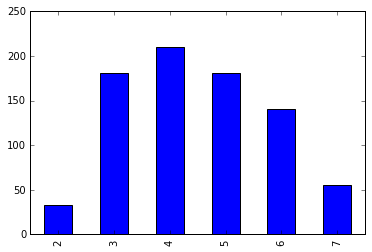

In [36]:
df['created_at'].dt.month.value_counts().sort_index().plot(kind='bar')

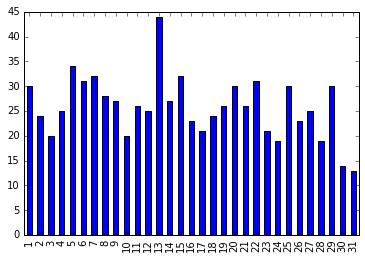

In [37]:
df['created_at'].dt.day.value_counts().sort_index().plot(kind='bar')

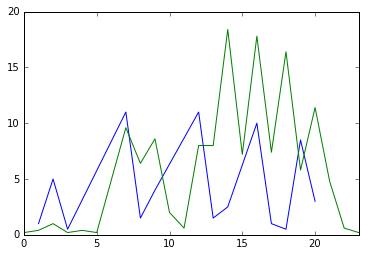

In [38]:
(df[(df.created_at.dt.dayofweek>=5)].created_at.dt.hour.value_counts()/2).sort_index().plot()
(df[(df.created_at.dt.dayofweek<5)].created_at.dt.hour.value_counts()/5).sort_index().plot()

In [39]:
print(len(df[(df.created_at.dt.dayofweek>=5)])/2)
print(len(df[(df.created_at.dt.dayofweek<5)])/5)

61.0
135.6


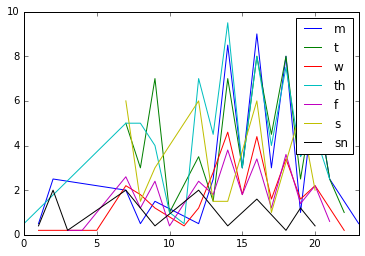

In [40]:
(df[(df.created_at.dt.dayofweek==0)].created_at.dt.hour.value_counts()/2).sort_index().plot()
(df[(df.created_at.dt.dayofweek==1)].created_at.dt.hour.value_counts()/2).sort_index().plot()
(df[(df.created_at.dt.dayofweek==2)].created_at.dt.hour.value_counts()/5).sort_index().plot()
(df[(df.created_at.dt.dayofweek==3)].created_at.dt.hour.value_counts()/2).sort_index().plot()
(df[(df.created_at.dt.dayofweek==4)].created_at.dt.hour.value_counts()/5).sort_index().plot()
(df[(df.created_at.dt.dayofweek==5)].created_at.dt.hour.value_counts()/2).sort_index().plot()
(df[(df.created_at.dt.dayofweek==6)].created_at.dt.hour.value_counts()/5).sort_index().plot()

plt.legend(['m','t','w','th','f','s','sn'])

In [ ]:
##text processing##

In [42]:
import nltk
nltk.download("stopwords")
import string
 
punctuation = list(string.punctuation)
stop = stopwords.words('english') + punctuation + ['rt', 'via']


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/juliadills/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [56]:
df['text'] = df['text'].str.lower().str.split()
df['text']= df['text'].apply(lambda x: [item for item in x if item not in stop])

In [59]:
len(df['text'][0])

10

In [64]:
#df.text.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0)

In [65]:
#what is the length of the longest tweet
import numpy as np
print (df.text.map(lambda x: len(x)).max())

22


In [66]:
df['word_count']=df.text.map(lambda x: len(x))

In [67]:
#take a look
df.head()

,id,created_at,text,word_count
0,756037281790713856,2016-07-21 08:05:09,"[circular, economy:, 3, considerations, solvin...",10
1,755795290356125696,2016-07-20 16:03:33,"[las, vegas, home, us's, largest, rooftop, #so...",10
2,755777057422974976,2016-07-20 14:51:06,"[un, chief, calls, quick, ratification, paris,...",10
3,755448628928507904,2016-07-19 17:06:03,"[world, poised, take, action, hfcs, week, http...",9
4,755432741219565568,2016-07-19 16:02:55,"[lord, stern:, departmental, merger, chance, e...",13


In [ ]:
#look into doing a sentiment analysis soon